In [16]:
!pip install nsepy

In [1]:
#Import modules
import nsepy
from datetime import date

In [2]:
#Call api using list of symbols and start-end dates
sbin = nsepy.get_history(symbol='SBIN',
                    start=date(2015,1,1), 
                    end=date(2015,1,10))

<AxesSubplot:xlabel='Date'>

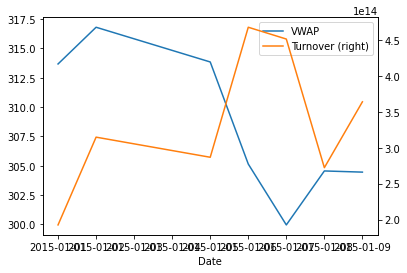

In [3]:
#Plot data on params
sbin[[ 'VWAP', 'Turnover']].plot(secondary_y='Turnover')

In [4]:
#Entire dataframe generated
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.00,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.60,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.80,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.90,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.40,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743
2015-01-08,SBIN,EQ,300.15,305.00,306.50,302.35,305.25,304.85,304.55,8939749,2.722593e+14,85776,3656015,0.4090
2015-01-09,SBIN,EQ,304.85,306.70,307.85,302.00,303.00,303.20,304.45,11953948,3.639361e+14,86383,4412814,0.3692


<AxesSubplot:xlabel='Date'>

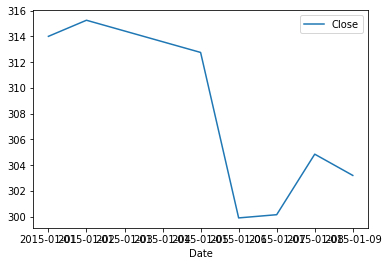

In [5]:
#Calling plot on 'Close' attribute
sbin[["Close"]].plot(secondary_y='Date')

### Reading Symbols from File

In [6]:
#Import pandas
import pandas as pd
#Import file and read
data=pd.read_csv("ind_niftymidcap50list.csv")
#Let's look at data
data.head(5)

,Company Name,Industry,Symbol,Series,ISIN Code
0,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017
1,Amara Raja Batteries Ltd.,AUTOMOBILE,AMARAJABAT,EQ,INE885A01032
2,Apollo Tyres Ltd.,AUTOMOBILE,APOLLOTYRE,EQ,INE438A01022
3,Ashok Leyland Ltd.,AUTOMOBILE,ASHOKLEY,EQ,INE208A01029
4,Balkrishna Industries Ltd.,AUTOMOBILE,BALKRISIND,EQ,INE787D01026


In [7]:
#symbols
symbols=list(data["Symbol"].values)

In [8]:
#Import dask
import dask

In [9]:
#Call api using list of symbols and start-end dates (Parallel Using Dask)
total_result=[]

for sym in symbols:
    sbin = dask.delayed(nsepy.get_history)(symbol=sym,start=date(2015,1,1),end=date(2016,1,1))
    total_result.append(sbin)
    
data_arr=dask.delayed()(total_result)

In [10]:
import time 
start=time.time()
total_history_dataset=data_arr.compute()
end=time.time()
print("Difference: {}".format(end-start))

Difference: 24.975979804992676


In [11]:
#Total symbols in the dataset generated
df=total_history_dataset
len(df)

50

In [12]:
df[1]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,AMARAJABAT,EQ,821.40,813.50,823.05,812.35,813.15,815.20,816.33,66592,5.436107e+12,2339,33173,0.4982
2015-01-02,AMARAJABAT,EQ,815.20,814.20,824.85,804.05,807.05,806.85,816.33,165833,1.353748e+13,3618,100794,0.6078
2015-01-05,AMARAJABAT,EQ,806.85,808.95,821.30,801.00,810.05,811.50,812.03,145133,1.178522e+13,4703,72070,0.4966
2015-01-06,AMARAJABAT,EQ,811.50,809.00,831.60,780.00,785.10,790.70,816.20,461406,3.765985e+13,18606,180751,0.3917
2015-01-07,AMARAJABAT,EQ,790.70,786.05,821.65,786.00,815.55,814.50,809.59,280672,2.272283e+13,9443,109256,0.3893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,AMARAJABAT,EQ,861.90,862.00,866.70,857.55,860.05,860.70,860.93,131114,1.128795e+13,7936,73972,0.5642
2015-12-29,AMARAJABAT,EQ,860.70,863.00,869.90,861.25,866.75,863.60,865.07,189856,1.642386e+13,7378,102115,0.5379
2015-12-30,AMARAJABAT,EQ,863.60,867.00,875.00,860.20,866.90,864.60,869.94,356968,3.105393e+13,11509,166347,0.4660


In [13]:
#Call api using list of symbols and start-end dates (Only using For-Loop)
total_result=[]

start=time.time()

for sym in symbols:
    sbin = nsepy.get_history(symbol=sym,start=date(2015,1,1),end=date(2016,1,1))
    total_result.append(sbin)
    
end=time.time()
print("Difference: {}".format(end-start))

Difference: 47.946338415145874


### Calculate % change of stocks

In [14]:
#Extracting close price
cp=df[1]["Close"].values[::-1]

#Calculate avg changes 
price1=cp[0:3]
price2=cp[1:4]
price3=price1-price2

import numpy as np
np.mean(price3)

1.283333333333341

In [15]:
price1

array([867.45, 861.8 , 864.6 ])

In [16]:
price3

array([ 5.65, -2.8 ,  1.  ])

In [17]:
price2

array([861.8, 864.6, 863.6])

In [18]:
print((cp[0]-cp[2])/cp[2]*100)

0.3296321998612101


In [19]:
def calc_change(df):
    cp=df["Close"].values[::-1]
    if ((cp[0]-cp[2])/cp[2]*100)  > 1:
        return 1 
    else:
        return 0

In [20]:
#Using DASK to calculate percentage change in stocks for last 4 days of data collected

result=[]
for i in range(len(df)):
    try:
        res=dask.delayed(calc_change)(df[i])
        result.append((df[i]["Symbol"].values[0],res))
    except:
        pass
    
z=dask.delayed()(result)

In [21]:
start=time.time()
z.compute()
end=time.time()
print("Duration: {}".format(end-start))

Duration: 0.0319981575012207


In [22]:
#Performing same task using For-Loop 

result=[]

start=time.time()
for i in range(len(df)):
    try:
        res=calc_change(df[i])
        result.append((df[i]["Symbol"].values[0],res))
    except:
        pass
    
end=time.time()
print("Duration: {}".format(end-start))

Duration: 0.0
